In [140]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
%matplotlib inline

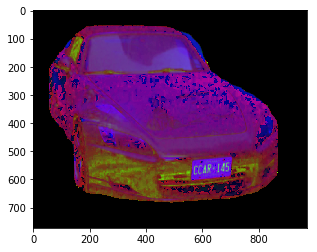

In [155]:
IMG_PATH = "t1/masked_cars1.png"
ORI_IMG_PATH = "ori/car1.JPG"
img = cv2.imread(IMG_PATH)
ori_img = cv2.imread(ORI_IMG_PATH)
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
img = cv2.GaussianBlur(img, (5, 5), 1, 1, cv2.BORDER_DEFAULT)
# plt.imshow(img)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
skimage.io.imsave("hsv.png", hsv)
plt.imshow(hsv)

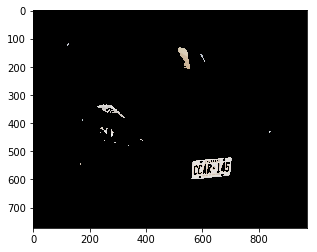

In [156]:
white_up = np.array([255, 255, 255])
white_low = np.array([0, 0, 200])
mask = cv2.inRange(hsv, white_low, white_up)
res = cv2.bitwise_and(img, img, mask=mask)
skimage.io.imsave("res.png", res)
plt.imshow(res)

In [157]:
img_a = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_a,200,255,0)
image, contours, hier = cv2.findContours(thresh, cv2.RETR_LIST,
                cv2.CHAIN_APPROX_SIMPLE)

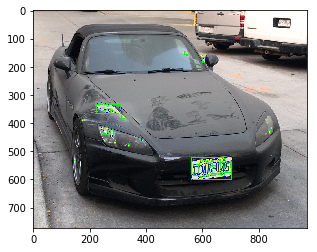

In [147]:
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    # draw a bounding rectangles
    cv2.rectangle(ori_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))
    cv2.drawContours(ori_img, [box], 0, (0, 0, 255))

cv2.drawContours(ori_img, contours, -1, (255, 255, 0), 1)
skimage.io.imsave("ori_img.png", ori_img)
plt.imshow(ori_img)

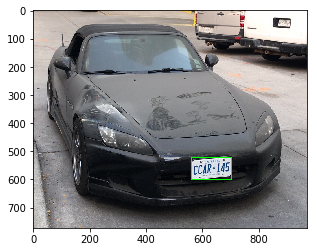

In [154]:
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cnt=contours[max_index]

x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(ori_img,(x,y),(x+w,y+h),(0,255,0),2)
skimage.io.imsave("largest_img.png", ori_img)
plt.imshow(ori_img)

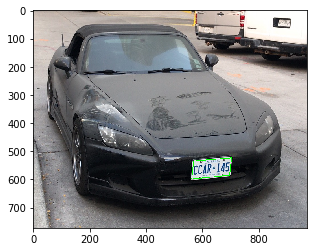

In [158]:
max_countour_idx = -1
max_countour_size = 0
for c in range(len(contours)):
    if cv2.contourArea(contours[c]) > max_countour_size:
        max_countour_size = cv2.contourArea(contours[c])
        max_countour_idx = c
arc_length = cv2.arcLength(contours[max_countour_idx], True)
approx_poly = cv2.approxPolyDP(contours[max_countour_idx], 0.02 * arc_length, True)
cv2.drawContours(ori_img, [approx_poly], -1, (0,255,0), 2)
skimage.io.imsave("poly_img.png", ori_img)
plt.imshow(ori_img)

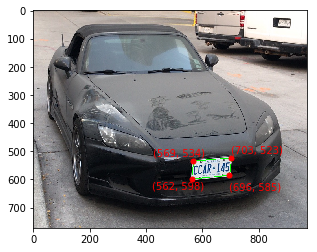

In [209]:
plt.plot(703, 523, 'ro', markersize=5)
plt.annotate('(703, 523)', (703, 523), xytext=(0, 5),
             textcoords='offset points', fontsize=10, color='red')
plt.plot(569, 534, 'ro', markersize=5)
plt.annotate('(569, 534)', (569, 534), xytext=(-40, 5),
             textcoords='offset points', fontsize=10, color='red')
plt.plot(562, 598, 'ro', markersize=5)
plt.annotate('(562, 598)', (562, 598), xytext=(-40, -10),
             textcoords='offset points', fontsize=10, color='red')
plt.plot(696, 585, 'ro', markersize=5)
plt.annotate('(696, 585)', (696, 585), xytext=(0, -15),
             textcoords='offset points', fontsize=10, color='red')
plt.imshow(ori_img)
plt.savefig('axis.png', dpi=300)

In [167]:
print(approx_poly)
print(approx_poly.shape)

[[[703 523]]

 [[569 534]]

 [[562 598]]

 [[696 585]]]
(4, 1, 2)


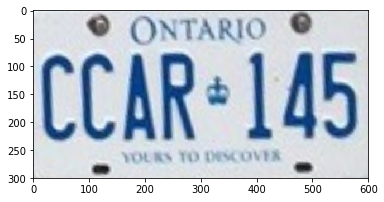

In [191]:
ori_img1 = cv2.imread(ORI_IMG_PATH)
ori_img1 = cv2.cvtColor(ori_img1, cv2.COLOR_BGR2RGB)
src_pts = np.squeeze(approx_poly, axis=1)
dst_pts = np.array([(0, 0), (600, 0), (600, 300), (0, 300)])
matrix, _ = cv2.findHomography(src_pts, dst_pts)
dst_img = cv2.warpPerspective(ori_img1, matrix, (600, 300))
skimage.io.imsave("homo_plate.png", dst_img[:,::-1, :])
plt.imshow(dst_img[:,::-1, :])